# EDA Grude

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load datasets

##### Dateset A

In [20]:
# Load the train and test data for location A form the parquet files into pandas dataframes

X_train_estimated_A = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_observed_A = pd.read_parquet('../data/A/X_train_observed.parquet')
X_test_estimated_A = pd.read_parquet('../data/A/X_test_estimated.parquet')
y_train_target_A = pd.read_parquet('../data/A/train_targets.parquet')


##### Dateset B

In [21]:
# Load the train and test data for location B form the parquet files into pandas dataframes

X_train_estimated_B = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_observed_B = pd.read_parquet('../data/B/X_train_observed.parquet')
X_test_estimated_B = pd.read_parquet('../data/B/X_test_estimated.parquet')
y_train_target_B = pd.read_parquet('../data/B/train_targets.parquet')

##### Dateset C

In [36]:
# Load the train and test data for location C form the parquet files into pandas dataframes

X_train_estimated_C = pd.read_parquet('../data/C/X_train_estimated.parquet')
X_train_observed_C = pd.read_parquet('../data/C/X_train_observed.parquet')
X_test_estimated_C = pd.read_parquet('../data/C/X_test_estimated.parquet')
y_train_target_C = pd.read_parquet('../data/C/train_targets.parquet')

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,...,354.886993,-39.528999,0.0,284.600006,100.0,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,...,359.638000,-39.609001,0.0,284.600006,100.0,6254.399902,0.6,-0.1,0.6,-0.0


### Graph of dateset split over time

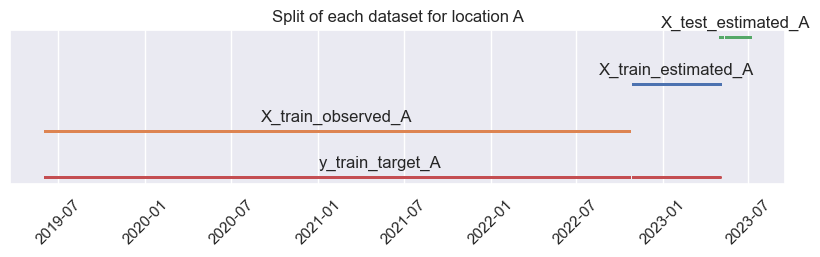

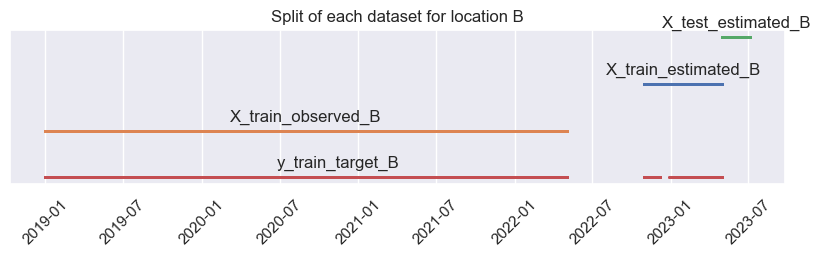

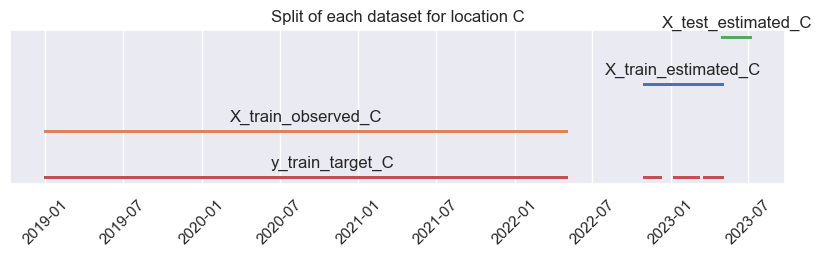

In [119]:
# Graph plotting a point for every row in al lthe datesets with y value equal to 1 and x axis equal to "date_calc" or time collumn

# Define a list of locations
locations = ['A', 'B', 'C']

# Create a loop to plot for each location
for location in locations:
    # Load the data for the current location
    X_train_estimated = globals()["X_train_estimated_" + location]
    X_train_observed = globals()["X_train_observed_" + location]
    X_test_estimated = globals()["X_test_estimated_" + location]
    y_train_target = globals()["y_train_target_" + location]
    
    # Set size of the plot as a narrow rectangle
    plt.figure(figsize=(10, 2))

    # Plot the lines for the current location
    plt.scatter(X_train_estimated['date_forecast'], np.ones(len(X_train_estimated)) * 0.3, s=1)
    plt.scatter(X_train_observed['date_forecast'], np.ones(len(X_train_observed)) * 0.2, s=1)
    plt.scatter(X_test_estimated['date_forecast'], np.ones(len(X_test_estimated)) * 0.4, s=1)
    plt.scatter(y_train_target['time'], np.ones(len(y_train_target)) * 0.1, s=1)

    # Hide the y axis
    plt.yticks([])

    # Rotate the x axis labels
    plt.xticks(rotation=45)

    # Add legend
    #plt.legend(['X_train_estimated_' + location, 'X_train_observed_' + location, 'X_test_estimated_' + location, 'y_train_target_' + location])

    # Add title
    plt.title('Split of each dataset for location ' + location)

    # Add the name of the dataset above the scatter plot
    plt.text(X_train_estimated['date_forecast'].iloc[len(X_train_estimated) // 2], 0.32, 'X_train_estimated_' + location, ha='center')
    plt.text(X_train_observed['date_forecast'].iloc[len(X_train_observed) // 2], 0.22, 'X_train_observed_' + location, ha='center')
    plt.text(X_test_estimated['date_forecast'].iloc[len(X_test_estimated) // 2], 0.42, 'X_test_estimated_' + location, ha='center')
    plt.text(y_train_target['time'].iloc[len(y_train_target) // 2], 0.12, 'y_train_target_' + location, ha='center')



    plt.show()

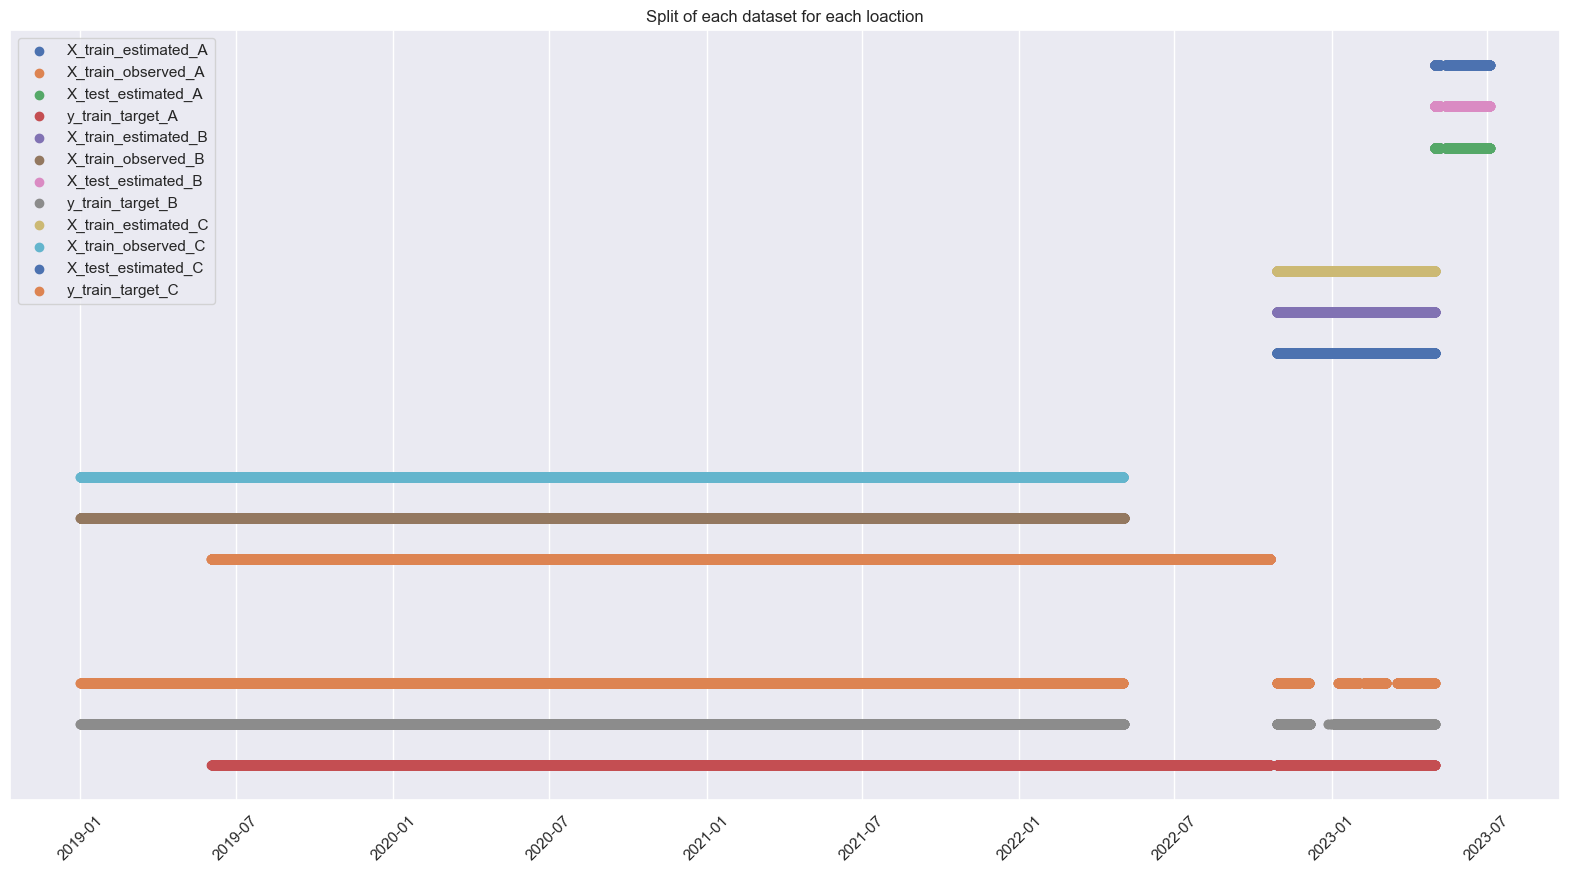

In [101]:
# Graph plotting a point for every row in X_train_estimated_A with y value equal to 1 and x axis equal to "date_forecast" colum

# Set size of the plot
plt.figure(figsize=(20, 10))

# Plot the lines for location A   

plt.scatter(X_train_estimated_A['date_forecast'], np.ones(len(X_train_estimated_A))* 0.3)
plt.scatter(X_train_observed_A['date_forecast'], np.ones(len(X_train_observed_A))* 0.2)
plt.scatter(X_test_estimated_A['date_forecast'], np.ones(len(X_test_estimated_A))* 0.4)
plt.scatter(y_train_target_A['time'], np.ones(len(y_train_target_A))* 0.1)

# Plot the lines for location B
plt.scatter(X_train_estimated_B['date_forecast'], np.ones(len(X_train_estimated_B))*0.32)
plt.scatter(X_train_observed_B['date_forecast'], np.ones(len(X_train_observed_B))*0.22)
plt.scatter(X_test_estimated_B['date_forecast'], np.ones(len(X_test_estimated_B))*0.42)
plt.scatter(y_train_target_B['time'], np.ones(len(y_train_target_B))*0.12)

# Plot the lines for location C
plt.scatter(X_train_estimated_C['date_forecast'], np.ones(len(X_train_estimated_C))*0.34)
plt.scatter(X_train_observed_C['date_forecast'], np.ones(len(X_train_observed_C))*0.24)
plt.scatter(X_test_estimated_C['date_forecast'], np.ones(len(X_test_estimated_C))*0.44)
plt.scatter(y_train_target_C['time'], np.ones(len(y_train_target_C))*0.14)

# Hide the y axis
plt.yticks([])

# Rotate the x axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(['X_train_estimated_A', 'X_train_observed_A', 'X_test_estimated_A', 'y_train_target_A',
            'X_train_estimated_B', 'X_train_observed_B', 'X_test_estimated_B', 'y_train_target_B',
            'X_train_estimated_C', 'X_train_observed_C', 'X_test_estimated_C', 'y_train_target_C'], loc='upper left')

# Add title
plt.title('Split of each dataset for each loaction')


plt.show()